# Machine Learning (Unsupervised, Clustering)
Tugas week4 day3: 18-01-2003

# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:<br>
1. Inisiasi jumlah kluster secara random, misalkan kita pilih k=2. K adalah sebuah parameter yang mewakilkan angka dari cluster yang data points nya akan dilakukan pengelompokan. => PILIH JUMLh k cluster
2. Tentukan posisi centroid secara random. => pilh posisi centroid(memnggunakan rata2) 
3. Hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance. => adalah formula dari titik dijumlahkan satu2
4. Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid. => setelah menjumlah dan merata2kan, ditemukan titik centroid baru, hitung kembali tiap jarak data poin ke centroid baru, dibentuk cluster dan dihitung lagi, begitu terus. akan berhenti ketika centroid tidak berubah 
5. Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi. 



---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.drop('ID_pelanggan', axis=1, inplace=True)
df.head()

Jenis Kelamin  Umur  Pendapatan pertahun (juta)  Skor Belanja (1-100)
0     Laki-laki  19.0                          15                  39.0
1     Laki-laki  21.0                          15                  81.0
2     Perempuan  20.0                          16                   6.0
3     Perempuan  23.0                          16                  77.0
4     Perempuan  31.0                          17                  40.0

# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data <b>Umur dan Skor Belanja(1-100).</b> Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










### Handling missing value dengan menggunakan method ='ffill'

In [2]:
df.isnull().sum()

Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [3]:
df.fillna(method='ffill', inplace=True)

In [4]:
df.isnull().sum()

Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

### Handling outlier menggunakan metode Interquartile range

In [5]:
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [6]:
df_outlier_removed = remove_outlier_IQR(df[['Umur','Skor Belanja (1-100)']])
df_outlier_removed.dropna(axis=0, inplace=True)

In [7]:
df_outlier_removed

Umur  Skor Belanja (1-100)
0    19.0                  39.0
1    21.0                  81.0
2    20.0                   6.0
3    23.0                  77.0
4    31.0                  40.0
..    ...                   ...
244  27.0                  69.0
245  59.0                  14.0
246  35.0                  90.0
247  37.0                  32.0
248  32.0                  86.0

[248 rows x 2 columns]

In [9]:
import seaborn as sns
sns.boxplot(x='Umur', data=df_outlier_removed)

<AxesSubplot:xlabel='Umur'>

<AxesSubplot:xlabel='Skor Belanja (1-100)'>

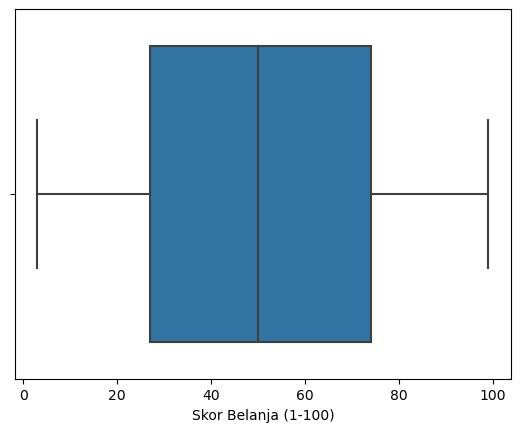

In [10]:
sns.boxplot(x='Skor Belanja (1-100)', data=df_outlier_removed)

In [11]:
df_outlier_removed.isnull().sum()

Umur                    0
Skor Belanja (1-100)    0
dtype: int64

### Lakukan rescaling data menggunakan StandardScaler

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_removed.astype(float))

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['Umur', 'Skor Belanja (1-100)'])

### Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..

In [ ]:
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_ 
new_dfoutlier_std['label_kmeans1'] = labels1

plt.figure(figsize=(8,5))
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans1 == 0], c='red', s = 50, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans1 == 1], c='blue', s = 50, edgecolor='green', linestyle='-')
                                                                                                                
centers = kmeans1.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

### Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat

In [ ]:
import warnings
warnings.filterwarnings('ignore')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')    
plt.show()

### Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan

In [ ]:
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(dfoutlier_std)
kmeans2.labels_

#### Viz based k=3

In [ ]:
labels2 = kmeans2.labels_

new_dfoutlier_std['label_kmeans2'] = labels2

plt.figure(figsize=(8,5))
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans2 == 0], c='red', s = 50, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans2 == 1], c='blue', s = 50, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans2 == 2], c='green', s = 50, edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

### Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(new_dfoutlier_std, labels=labels1))
print(silhouette_score(new_dfoutlier_std, labels=labels2))

# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:<br>
bisa dilihat silhoute koefisien untuk masing2 cluster
- koef silhoute untuk cluster 2 adalah 56%
- sedang koef silhoute untuk cluster 3 adalah 54,6%

artinya cluster 2 lebih bisa dibandingkan dan lebih insightful daripada cluster 3.<br>

=> hasilnya,
- cluster biru => pelanggan supermarket dengan umur rendah relatif memiliki nilai skor belanja yang tinggi, mungkin anak2 lebih suka beli mainan yang pricey sehingga nilai skor belanja tinggi
- cluster merah => pelanggan supermarket dengan umur dewasa relatif memiliki nilai skor belanja yang rendah, mungkin karena mereka sudah bisa memilih barang apa yang hanya ingin dibeli dan penghematan dalam spending money.<br>
<b>Jadi, untuk kemajuan perusahaan, harusnya display mainan dan jajanan anak-anak ditempatkan di tempat yang se strategis mungkin dan iconic supaya menarik perhatian anak.



---



---



---



Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)